

# Project :  No-show Appointments Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics of the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
●It says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('noshowappointmentsL.csv')
df_d = pd.read_csv('noshowappointmentsL.csv',parse_dates=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

There are 110527 patients and 14 columns .

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We have a description about No-show appointments column wise PatientId, AppointmentID, Age, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received.
Whereas the maximum age is 115-year-old and over a maximum 50% of them are patients also babies are there.
Most of them do not have Hypertension, Diabetes, Handicaps, and Alcoholism.
Average Scholarship is 9.8% which indicates patient should enroll in Brasilian welfare.
Alcoholism is drunk around 3.0% from the total.
The description is giving mean values of each of the columns also many other values like max, min, percentage-wise gave.In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.




### Groom The Details 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

None of the frameworks has NULL value so all the boundary has been filled.


In [34]:
sum(df.duplicated())

635

Wowww,
Data set don't any duplicates, it does meant it is in pure form ...!!! 

In [8]:
df['PatientId'].duplicated().sum()

48228

Omg...
There are 48783 patients who have appointed more times !!!

### Clean Data

Analyzing Show Up appointment so we have the dependent variable is No-show column from data.
Dropping PatientId, AppointmentID, AppointmentDay and ScheduledDay to have some fare analysis among independent variables.

In [3]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


New Data with columns Gender, Age, Neighbourhood, Scholarship, Hypertension, scheduled days, appointment day, Diabetes, Alcoholism, Handicap, SMS_received, and No-show.

Converting 'No-show' to No_show 

In [4]:
df.rename(columns = {'No-show':'No_show'},inplace=True)


Let's see some patients with a new set.

In [11]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Variation of Appointments with Malady 




Age is one of the important to analyze but the data type is float... 
So extract it to it.


In [12]:
df['Age'] = df['Age'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb0e12320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb0c65e80>]], dtype=object)

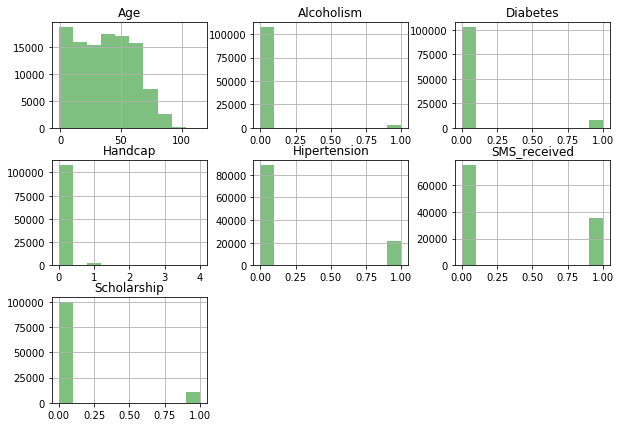

In [13]:
df.hist(figsize=(10,7), color='green',label='Variations with malady', alpha=0.5)

All the possible variations of data set for patients to show up the appointment.

In [5]:
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'

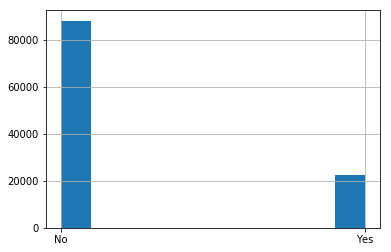

In [7]:
df["No_show"].hist(label='Dependent variable No_show')

Patients are showing up on their appointments are very less nearly above 20000 only but No-showing is very high more than 80000 patients.

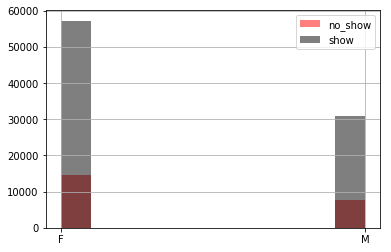

In [16]:
df.Gender[no_show].hist(alpha = 0.5, label = 'no_show', color='red')
df.Gender[show].hist(alpha = 0.5, label = 'show', color='black')
plt.legend();

Male Patients generally show up appointments more but the number is less. 
Female Patients generally show up appointments less but the number is more than Male.

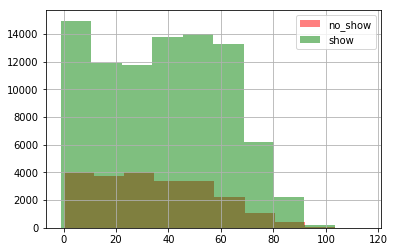

In [17]:
df.Age[no_show].hist(alpha = 0.5, label = 'no_show', color='red')
df.Age[show].hist(alpha = 0.5, label = 'show', color='green')
plt.legend();

Age between 0-10-year-old Patients generally don't show up appointments more but show up number is good as compare to old age group (80-100) year-old ages 

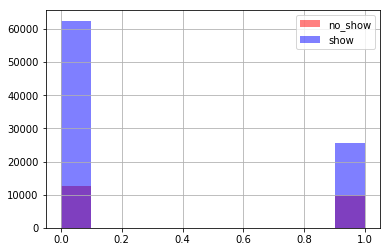

In [18]:
df.SMS_received[no_show].hist(alpha = 0.5, label = 'no_show', color='red')
df.SMS_received[show].hist(alpha = 0.5, label = 'show', color='blue')
plt.legend();

Those who don't receive SMS patients not showing up their appointments.
But SMS received patients percentage is good they are showing up to appointments.

In [19]:
#Scholarship	Hipertension	Diabetes	Alcoholism	Handcap
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


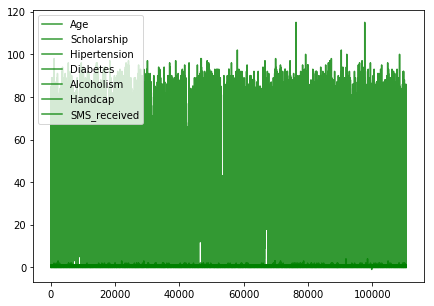

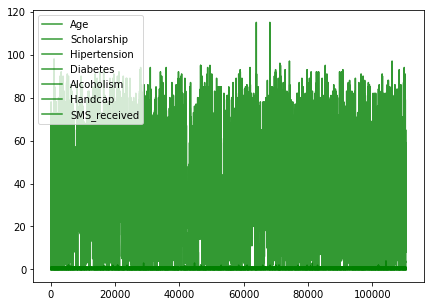

In [6]:
df.groupby(['No_show']).plot(kind='line', figsize = (7,5), alpha=0.8 ,color='green', label = 'No vs Yes' );

Male patients variation vs Female pationts variations with show up appointment.

### Why do 30% of patients miss their scheduled appointments with growth of appointments??

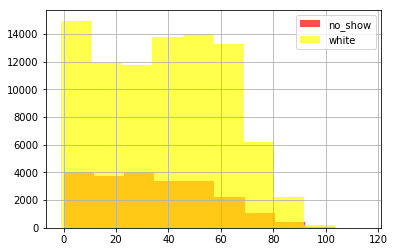

In [21]:

df.Age[no_show].hist(alpha = 0.7, label = 'no_show', color='red')
df.Age[show].hist(alpha = 0.7, label = 'white', color='yellow')
plt.legend();

In the data(Instagram) kids, young and old age peoples have an appointment in the hospital.
Some of them don't but Many of them regularly attempt there show up. 
The reason is other frameworks like Hypertension, Diabetes, Alcoholism, and Handicaps which make the patient to the hospital for a cure but remaining don't go because of the reasons shown below.

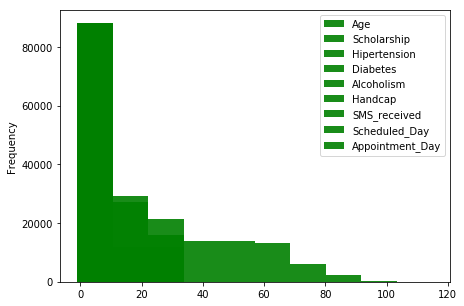

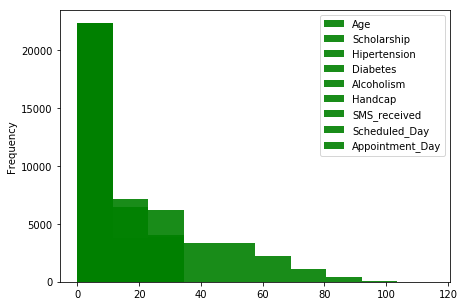

In [31]:
df.groupby(['No_show']).plot(kind='hist', figsize = (7,5), alpha=0.9 ,color='green' ,label = 'No vs Yes' );

Show up appointment is nearly 80000 patients who Missed appointments nearly 20000 are defined “patients who neither kept nor canceled their scheduled appointments” with frameworks Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No_show. 

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [30]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df_d['date'] = pd.to_datetime(df_d['ScheduledDay'])
df['Scheduled_Day'] = df_d['date'].dt.day

Extraction of Scheduled Day from datetime to know is it on the same day as Appointment or not.

In [22]:
df_d['date'] = pd.to_datetime(df_d['AppointmentDay'])
df['Appointment_Day'] = df_d['date'].dt.day


Extraction of Appointment Day from datetime to know is it on the same day as Scheduled or not.

In [18]:
scheduled_Day = df.Scheduled_Day == True
appointment_Day = df.Appointment_Day == False

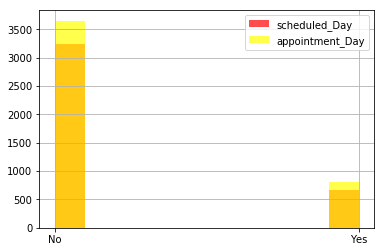

In [20]:
df.No_show[scheduled_Day].hist(alpha = 0.7, label = 'scheduled_Day', color='red')
df.No_show[appointment_Day].hist(alpha = 0.7, label = 'appointment_Day', color='yellow')
plt.legend();

Here a comparison with show up of appointment with days, but scheduled days are less as compare with appointment days so we below are some ways to cure it.

In [23]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Scheduled_Day,Appointment_Day
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,29
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,29
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,29
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,29
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,29


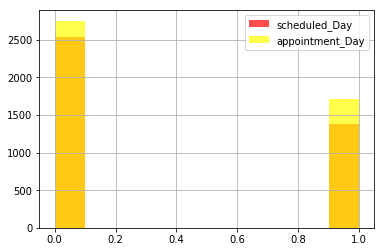

In [26]:
df.SMS_received[scheduled_Day].hist(alpha = 0.7, label = 'scheduled_Day', color='red')
df.SMS_received[appointment_Day].hist(alpha = 0.7, label = 'appointment_Day', color='yellow')
plt.legend();

A comparison with SMS received is such a good thing happened to a patient for an appointment.
Due to again alarm they come to knew and visited the hospital so this the 1st way to the patient will show up for their scheduled appointment.

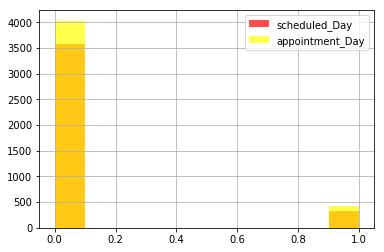

In [27]:
df.Scholarship[scheduled_Day].hist(alpha = 0.7, label = 'scheduled_Day', color='red')
df.Scholarship[appointment_Day].hist(alpha = 0.7, label = 'appointment_Day', color='yellow')
plt.legend();

Comparision with Scholarship is also a good way to patient for awairing about and govt fund can make able to patient for appointment.
We can say it 2nd way to patient will show up for their scheduled appointment.

#### Reasons for both of the above question:

Did not have transportation
• Forgot about the appointment/Not sure if they had
an appointment
• Unable to pay copay/deductible, did not have insurance, couldn’t afford to pay, etc.
• Thought the appointment was not essential or uninterested in care
• Not satisfied with the PCP or had negative emotions
about the PCP or practice
• Used another source of care or returned to the ER
• Was not feeling well or too sick to come to the scheduled appointment

<a id='conclusions'></a>
## Conclusions

> **Tip**: This study emphasized the need for more research for a better understanding of the problem. We made
recommendations for prompting patients about their upcoming appointments, helping patients get transportation to
healthcare facilities and making efforts to ensure better communication between the patients and the healthcare providers to understand the complex interplay between personal, systemic and financial(Scholarships) barriers in completing appointments


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0